In [1]:
import numpy as np
from math import log, sqrt, exp
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import time
%matplotlib inline

In [2]:
def log_likelihood(n1, n2, a, W):
    # this function takes a numpy array for n1, n2, and the accuracy (0/1), whether they answerd correctly
    # as well as W, the hypothesis
    # and returns the *log* likelihood of the responses, log P(acc | n1, n2, W)

    assert(len(n1) == len(n2) == len(a))

    p = 1.0-scipy.stats.norm.cdf(0, loc=np.abs(n1-n2),\
        scale=W*np.sqrt(n1**2 + n2**2)) # the probability of answering correctly
    return np.sum(np.where(a, np.log(p), np.log(1.0-p)))

# Problem 1

We're taking the log of the probabilities for an easier time computing the sampler, allowing us to use a summation multiplied by a probability instead of a product operator multiplied by a probability.

# Problem 2

Given that continuous Bayes rule is $P(H|D) = \frac{P(D|H)P(H)}{\int P(H'|D)P(H')dH'}$, making our probability equal to P(W'|D)/P(W|D) will cancel out the denominator of this equation, allowing us to not have to solve an integral.

# Problem 3

In [3]:
data = pd.read_csv("Assignment9-data.csv")
def log_prior(W) :
    if W < 0:
        return 0
    else:
        return np.log(np.exp(-W))

def log_posterior(W):
    return log_prior(W) + log_likelihood(data['n1'],\
                data['n2'], data['correct'], W)

# Problem 4

In [17]:
wlist = []
posteriors = []
wlist.append(np.random.uniform(0, 1))
posteriors.append(log_posterior(wlist[-1]))

start = time.time()
for i in range(300):
    w = wlist[-1]
    w_next = wlist[-1] + np.random.normal(0, .1)
    ratio = np.exp((log_posterior(w_next))-(log_posterior(w)))
    
    if ratio > 1:
        wlist.append(w_next)
        posteriors.append(log_posterior(w_next))
    else:
        
        rand = np.random.uniform(0,1)
        if ratio > rand :
            wlist.append(w_next)
            posteriors.append(log_posterior(w_next))
        else :
            wlist.append(w) 
            posteriors.append(log_posterior(w))
end = time.time()
print(end-start)

1.2347338199615479


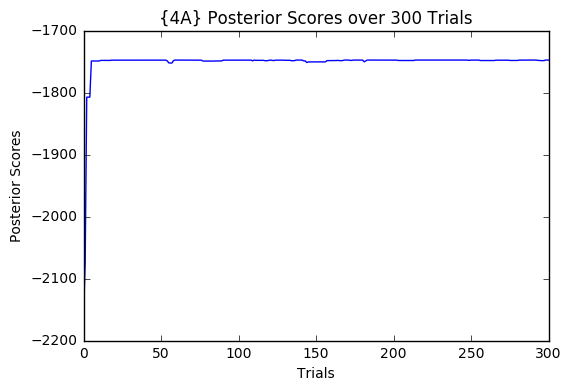

In [18]:
plt.plot(np.arange(len(posteriors)), posteriors)
plt.xlabel("Trials")
plt.ylabel("Posterior Scores")
plt.title("{4A} Posterior Scores over 300 Trials")

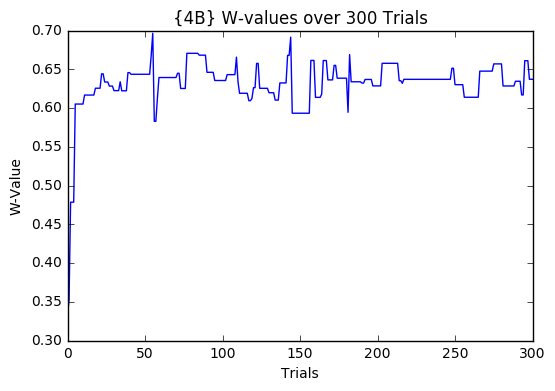

In [19]:
plt.plot(range(len(wlist)), wlist)
plt.xlabel("Trials")
plt.ylabel("W-Value")
plt.title("{4B} W-values over 300 Trials")

In [20]:
wlist = []
posteriors = []
wlist.append(np.random.uniform(0, 1))
posteriors.append(log_posterior(wlist[-1]))

start = time.time()
for i in range(11000):
    w = wlist[-1]
    w_next = wlist[-1] + np.random.normal(0, .1)
    ratio = np.exp((log_posterior(w_next))-(log_posterior(w)))
    
    if ratio > 1:
        wlist.append(w_next)
        posteriors.append(log_posterior(w_next))
    else:
        
        rand = np.random.uniform(0,1)
        if ratio > rand :
            wlist.append(w_next)
            posteriors.append(log_posterior(w_next))
        else :
            wlist.append(w) 
            posteriors.append(log_posterior(w))
end = time.time()
print(end-start)

42.81254529953003


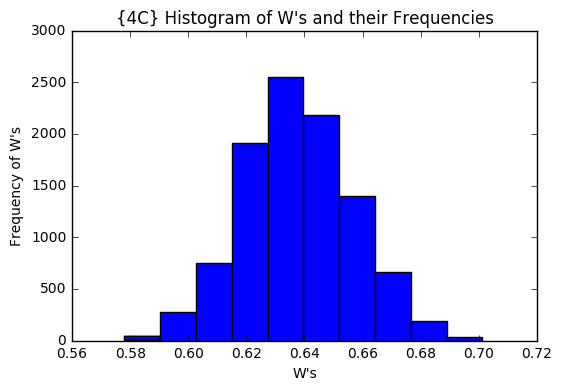

In [21]:
wlistburned = wlist[1000:]
plt.hist(wlistburned)
plt.title("{4C} Histogram of W's and their Frequencies")
plt.xlabel("W's")
plt.ylabel("Frequency of W's")

# Problem 5

In [22]:
inlist = [i for i in wlistburned if 0.2 < i < 0.3]
len(inlist)

0

As shown here, there is a 0% probability of any i in wlistburned being between 0.2 and 0.3.

# Problem 6 EC

In [23]:
#################################
###    One chain 200 times    ###
#################################

onetrialw = []
onetrialpost = []
done = False

overall_max_200 = []
for i in range(100):
    wlist = []
    posteriors = []
    wlist.append(np.random.uniform(0, 1))
    posteriors.append(log_posterior(wlist[-1]))
    
    for i in range(200):
        w = wlist[-1]
        w_next = wlist[-1] + np.random.normal(0, .1)
        ratio = np.exp((log_posterior(w_next))-(log_posterior(w)))

        if ratio > 1:
            wlist.append(w_next)
            posteriors.append(log_posterior(w_next))
        else:
            rand = np.random.uniform(0,1)
            if ratio > rand :
                wlist.append(w_next)
                posteriors.append(log_posterior(w_next))
            else :
                wlist.append(w) 
                posteriors.append(log_posterior(w))
    if done == False:
        onetrialw = wlist
        onetrialpost = posteriors
        done = True
    overall_max_200.append(max(posteriors))

In [24]:
np.mean(overall_max_200)

-1747.6883789126723

In [25]:
#################################
###    Two chain 100 times    ###
#################################

twotrialw = []
twotrialpost = []
twodone = False

overall_max_2x00 = []
for i in range(100):
    wlist = []
    posteriors = []
    wlist.append(np.random.uniform(0, 1))
    posteriors.append(log_posterior(wlist[-1]))
    
    for i in range(100):
        w = wlist[-1]
        w_next = wlist[-1] + np.random.normal(0, .1)
        ratio = np.exp((log_posterior(w_next))-(log_posterior(w)))

        if ratio > 1:
            wlist.append(w_next)
            posteriors.append(log_posterior(w_next))
        else:
            rand = np.random.uniform(0,1)
            if ratio > rand :
                wlist.append(w_next)
                posteriors.append(log_posterior(w_next))
            else :
                wlist.append(w) 
                posteriors.append(log_posterior(w))
    wlist1 = []
    posteriors1 = []
    wlist1.append(np.random.uniform(0, 1))
    posteriors1.append(log_posterior(wlist1[-1]))
    
    for i in range(100):
        w = wlist1[-1]
        w_next = wlist1[-1] + np.random.normal(0, .1)
        ratio = np.exp((log_posterior(w_next))-(log_posterior(w)))

        if ratio > 1:
            wlist1.append(w_next)
            posteriors1.append(log_posterior(w_next))
        else:
            rand = np.random.uniform(0,1)
            if ratio > rand :
                wlist1.append(w_next)
                posteriors1.append(log_posterior(w_next))
            else :
                wlist1.append(w) 
                posteriors1.append(log_posterior(w))
    if twodone == False:
        twotrialw = wlist1+wlist
        twotrialpost = posteriors+posteriors1
        twodone = True
    overall_max_2x00.append(max(max(posteriors), max(posteriors1)))

In [26]:
np.mean(overall_max_2x00)

-1747.6886948078238

<b> My definition of "goodness" is the higher average posterior probability between the two trials. </b>

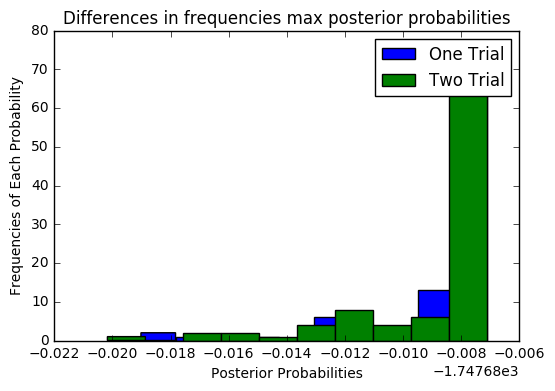

In [27]:
plt.hist(overall_max_200, label = "One Trial")
plt.hist(overall_max_2x00, label = "Two Trial")
plt.legend()
plt.title("Differences in frequencies max posterior probabilities")
plt.ylabel("Frequencies of Each Probability")
plt.xlabel("Posterior Probabilities")

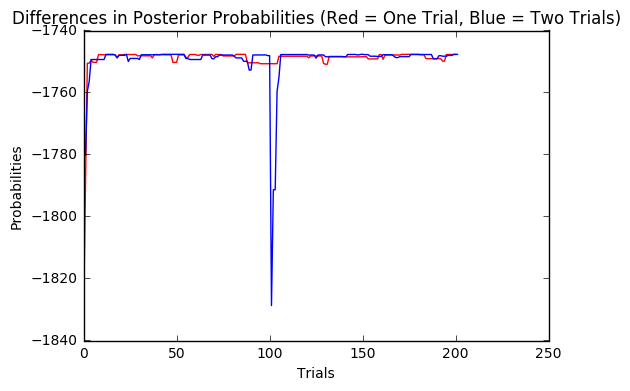

In [28]:
plt.plot(range(len(onetrialpost)), onetrialpost, "r")
plt.plot(range(len(twotrialpost)), twotrialpost, "b")
plt.title("Differences in Posterior Probabilities (Red = One Trial, Blue = Two Trials)")
plt.ylabel("Probabilities")
plt.xlabel("Trials")

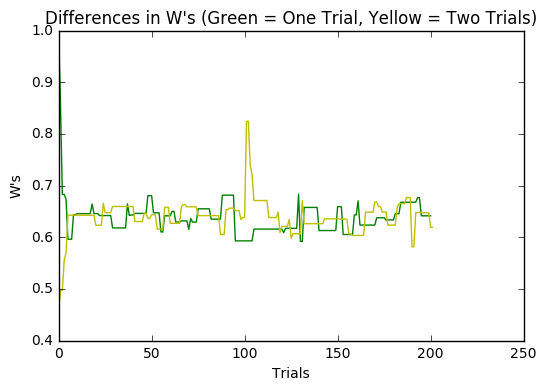

In [29]:
plt.plot(range(len(onetrialw)), onetrialw, "g")
plt.plot(range(len(twotrialw)), twotrialw, "y")
plt.title("Differences in W's (Green = One Trial, Yellow = Two Trials)")
plt.ylabel("W's")
plt.xlabel("Trials")

<b> According to these visualizations, running two chains of one hundred trials each vs running one chain of two hundred trials is more or less irrelevant, as both of them will return around the same posterior probabilities and W's, as we can see in the graphs. </b>